## Module importation

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
from matplotlib_venn import venn3

## Data Loading

In [3]:
data = pd.read_csv("METABRIC_RNA_Mutation.csv")
data

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,7295,43.10,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,LumA,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1900,7296,42.88,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1901,7297,62.90,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1902,7298,61.16,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0


## Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 693 entries, patient_id to siah1_mut
dtypes: float64(498), int64(5), object(190)
memory usage: 10.1+ MB


In [4]:
data.death_from_cancer.value_counts()

death_from_cancer
Living                  801
Died of Disease         622
Died of Other Causes    480
Name: count, dtype: int64

In [5]:
data.cancer_type.value_counts()

cancer_type
Breast Cancer     1903
Breast Sarcoma       1
Name: count, dtype: int64

In [6]:
data.overall_survival.value_counts()

overall_survival
0    1103
1     801
Name: count, dtype: int64

In [7]:
data.isna().sum()

patient_id                 0
age_at_diagnosis           0
type_of_breast_surgery    22
cancer_type                0
cancer_type_detailed      15
                          ..
hras_mut                   0
prps2_mut                  0
smarcb1_mut                0
stmn2_mut                  0
siah1_mut                  0
Length: 693, dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
5,10,78.77,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
8,28,86.41,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
9,35,84.22,MASTECTOMY,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,Her2,1.0,Negative,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1618,6232,71.22,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,0,LumA,5.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1619,6233,70.65,BREAST CONSERVING,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,0,LumB,5.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1621,6237,75.62,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,Basal,5.0,Negative,...,0,0,0,0,0,0,0,0,0,0
1623,6239,52.84,BREAST CONSERVING,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,Normal,5.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data.drop(columns=['patient_id'],inplace=True)

## Survived & Died Analysis

## Overall Survival

In [11]:
died = data[data['overall_survival']==0]
survived = data[data['overall_survival']==1]

alive = data[data['death_from_cancer']=='Living']
died_cancer = data[data['death_from_cancer']=='Died of Disease']
died_not_cancer = data[data['death_from_cancer']=='Died of Other Causes']

In [18]:
print("Percentage of patient died from breast cancer: ",died_cancer.value_counts().sum()/len(data)*100)

Percentage of patient died from breast cancer:  33.88278388278388


In [19]:
print("Percentage of patient survived from breast cancer: ",alive.value_counts().sum()/len(data)*100)

Percentage of patient survived from breast cancer:  44.32234432234432


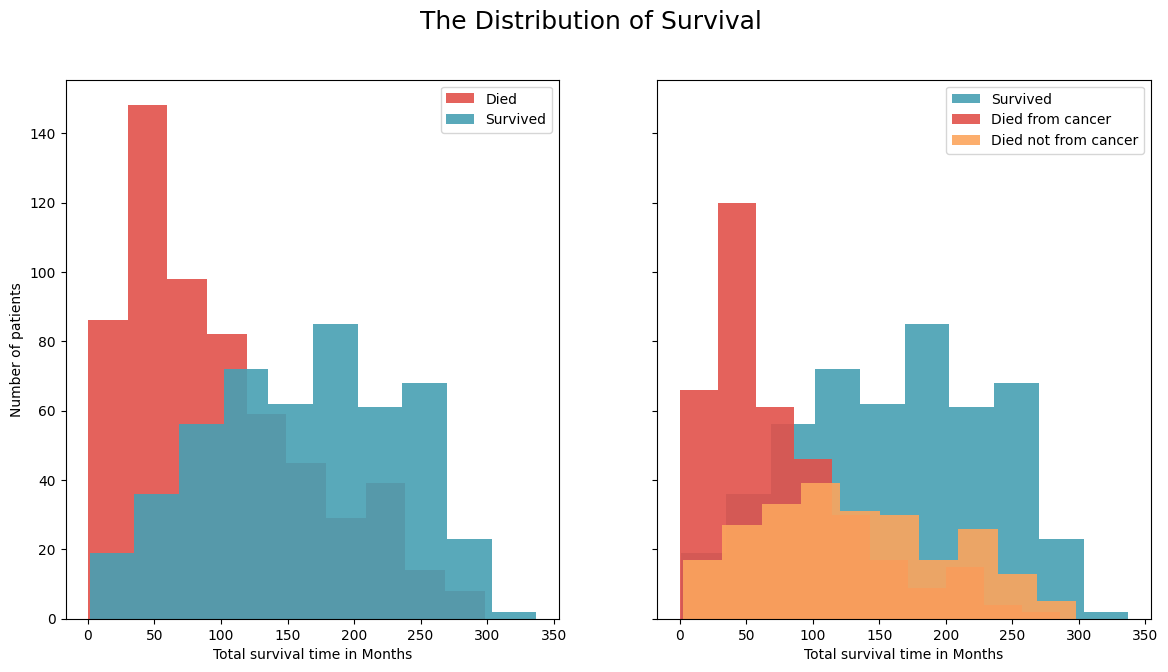

In [13]:
color= "Spectral"
fig, ax = plt.subplots(ncols=2, figsize=(14,7), sharey=True)

fig.suptitle('The Distribution of Survival', fontsize = 18)

ax[0].hist(died['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[0], label='Died')
ax[0].hist(survived['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[0].legend()

ax[1].hist(alive['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[1].hist(died_cancer['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[0], label='Died from cancer')
ax[1].hist(died_not_cancer['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[1], label='Died not from cancer')
ax[1].legend()

ax[0].set_xlabel('Total survival time in Months')
ax[0].set_ylabel('Number of patients')
ax[1].set_xlabel('Total survival time in Months')
ax[1].set_ylabel('')

plt.show()

## Clinical data Analysis

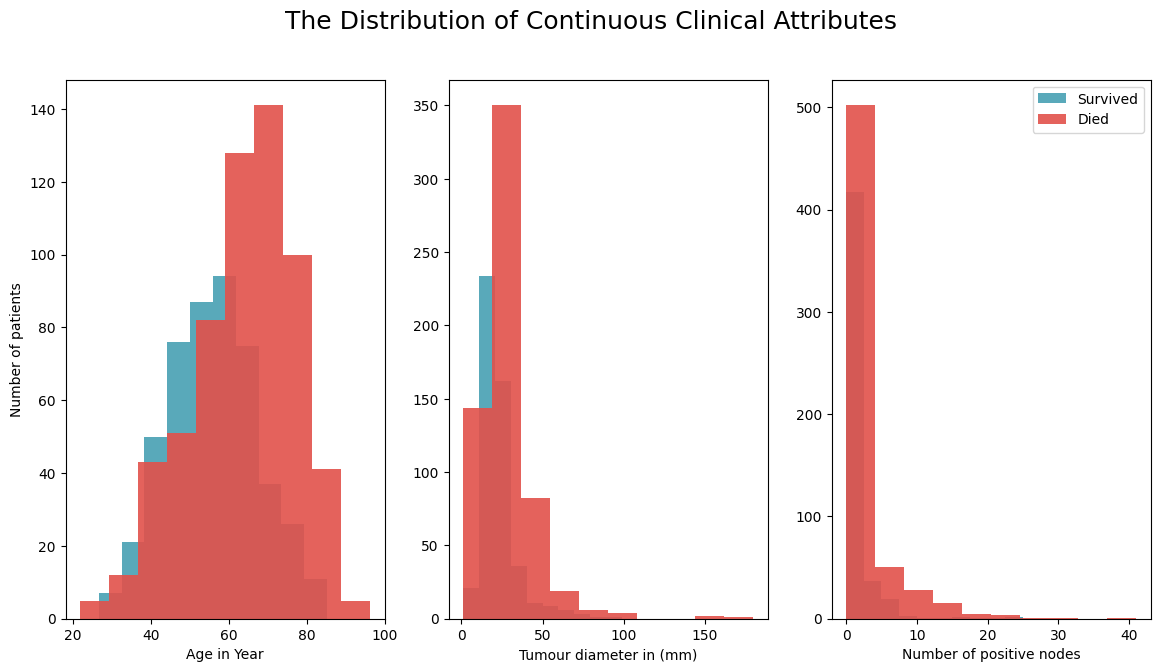

In [14]:
fig, ax = plt.subplots(ncols=3, figsize=(14,7))
fig.suptitle('The Distribution of Continuous Clinical Attributes', fontsize = 18)

ax[0].hist(survived['age_at_diagnosis'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[0].hist(died['age_at_diagnosis'], alpha=0.9, color=sns.color_palette(color)[0], label='Died')
#ax[0].legend()

ax[1].hist(survived['tumor_size'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[1].hist(died['tumor_size'], alpha=0.9, color=sns.color_palette(color)[0], label='Died')
#ax[1].legend()

ax[2].hist(survived['lymph_nodes_examined_positive'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[2].hist(died['lymph_nodes_examined_positive'], alpha=0.9, color=sns.color_palette(color)[0], label='Died')
ax[2].legend()

ax[0].set_xlabel('Age in Year')
ax[0].set_ylabel('Number of patients')
ax[1].set_xlabel('Tumour diameter in (mm)')
ax[1].set_ylabel('')
ax[2].set_xlabel('Number of positive nodes')
ax[2].set_ylabel('')

plt.show()

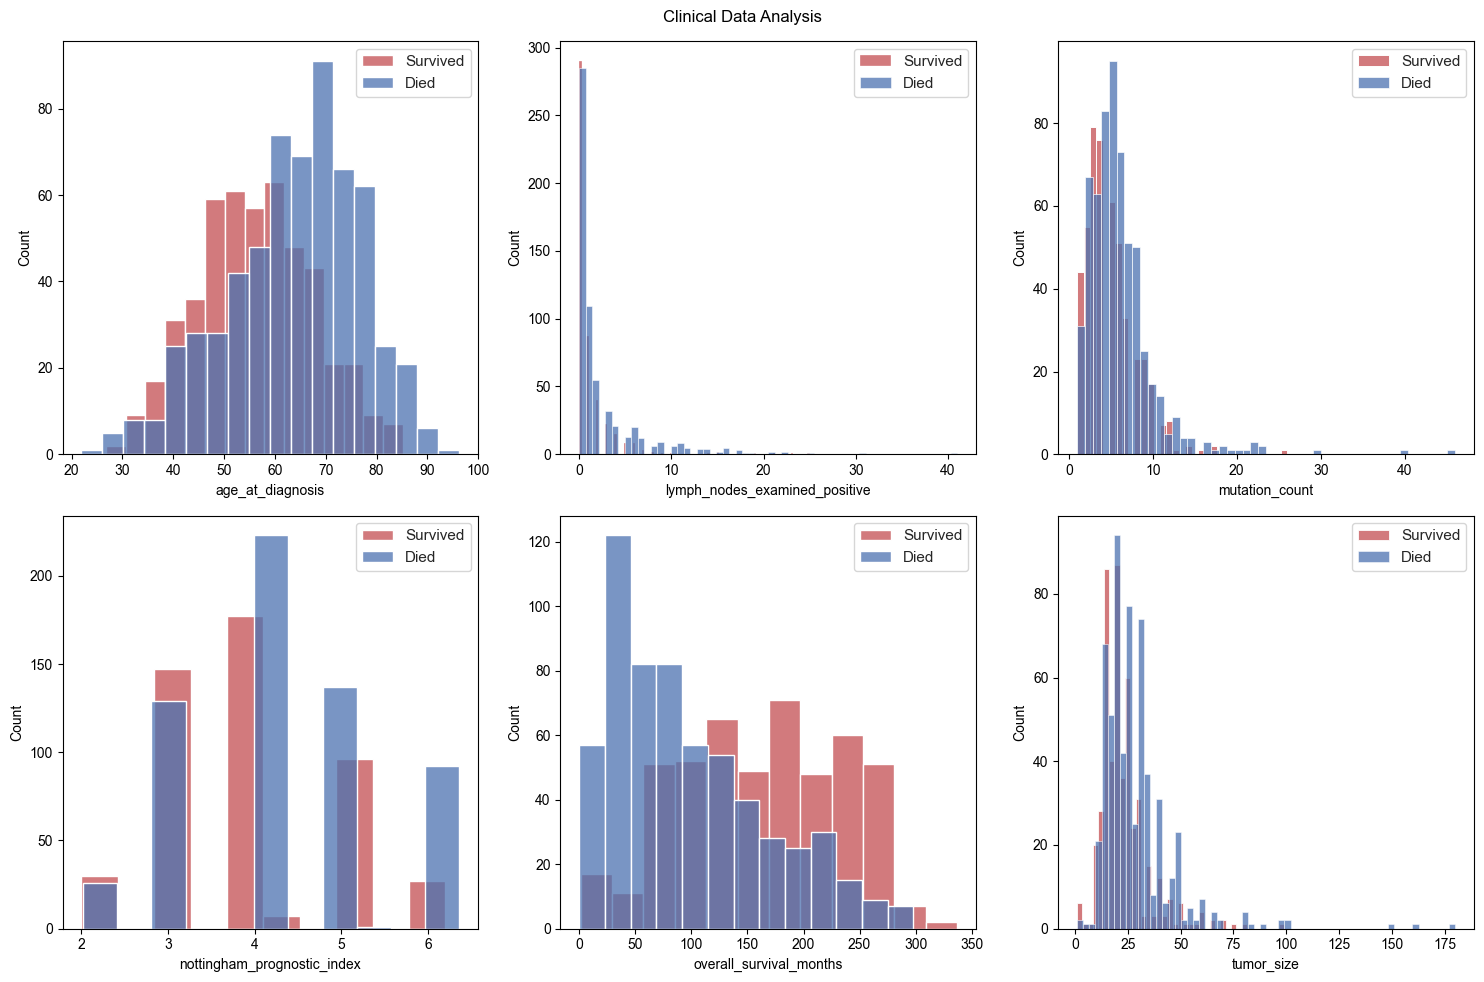

In [15]:
columns = ['age_at_diagnosis', 'lymph_nodes_examined_positive','mutation_count','nottingham_prognostic_index', 'overall_survival_months', 'tumor_size' ]   
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Clinical Data Analysis')
    
sns.set(style="whitegrid")
    
for i,ax in zip(data[columns].columns,axs.flatten()):
    sns.histplot(data[i][data['overall_survival']==1], color='r', label = 'Survived',ax=ax)
    sns.histplot(data[i][data['overall_survival']==0], color='b', label = 'Died',ax=ax)
    ax.legend(loc='best')
plt.tight_layout()
plt.show()

## histopathological data analysis

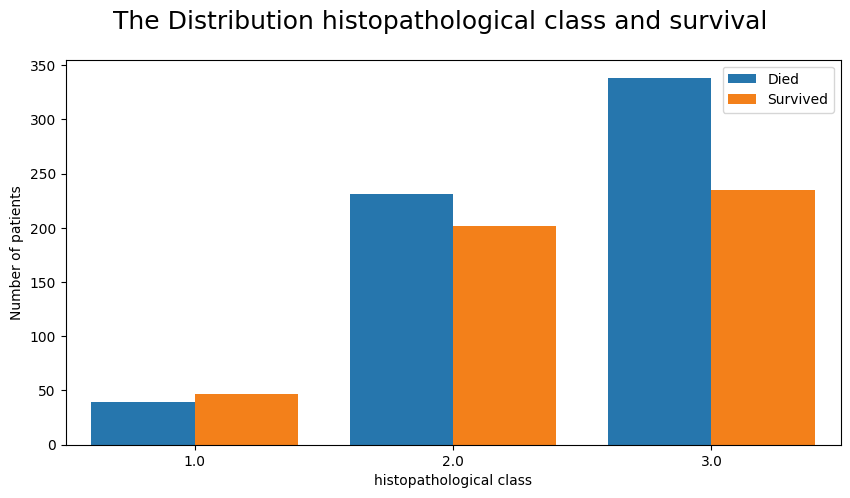

In [13]:
fig, ax = plt.subplots( figsize=(10,5))
fig.suptitle('The Distribution histopathological class and survival', fontsize = 18)

sns.countplot(x='neoplasm_histologic_grade', hue='overall_survival' ,data = data, ax=ax, saturation=0.90)
ax.legend([ 'Died', 'Survived'])

ax.set_xlabel('histopathological class')
ax.set_ylabel('Number of patients')

plt.show()

### Visualise the treatments and proportion death for other groups using venn diagram


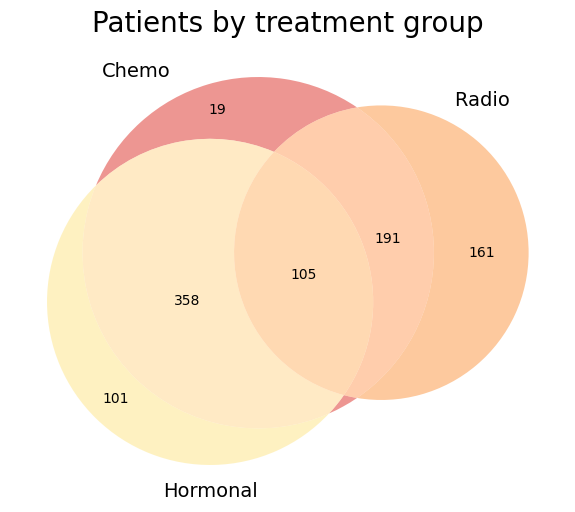

In [16]:
#first create subsets for different combinations of treatments
chemo = data[(data["chemotherapy"]==True) & (data["radio_therapy"]==False) & (data["hormone_therapy"]==False)]
radio = data[(data["chemotherapy"]==False) & (data["radio_therapy"]==True) & (data["hormone_therapy"]==False)]
hormonal = data[(data["chemotherapy"]==False) & (data["radio_therapy"]==False) & (data["hormone_therapy"]==True)]
chemo_radio = data[(data["chemotherapy"]==True) & (data["radio_therapy"]==True) & (data["hormone_therapy"]==False)]
radio_hormonal = data[(data["chemotherapy"]==False) & (data["radio_therapy"]==True) & (data["hormone_therapy"]==True)]
hormonal_chemo = data[(data["chemotherapy"]==True) & (data["radio_therapy"]==False) & (data["hormone_therapy"]==True)]
all_3 = data[(data["chemotherapy"]==True) & (data["radio_therapy"]==True) & (data["hormone_therapy"]==True)]

#calculate number of people for each combination and proportion death
df_subsets = [chemo, radio, hormonal, chemo_radio, radio_hormonal, hormonal_chemo, all_3]
sizes=[]
proportiondeath=[]
for dataframe in df_subsets:
    sizes.append(np.shape(dataframe)[0])
    proportiondeath.append(np.mean(dataframe["overall_survival"]))

#set size of circles relative to size of each subset (where possible)
#set gradient of blue according to proportion of death in subset calculated above
fig, ax = plt.subplots(figsize=(8,6))
v = venn3(subsets=sizes, set_labels=("Chemo", "Radio ", "Hormonal"), ax=ax, alpha=0.6, set_colors= sns.color_palette(color))

for text in v.set_labels:
    text.set_fontsize(14)
    
ax.set_title("Patients by treatment group", size=20)
plt.show()

In [11]:
data.type_of_breast_surgery.value_counts()

MASTECTOMY           630
BREAST CONSERVING    462
Name: type_of_breast_surgery, dtype: int64

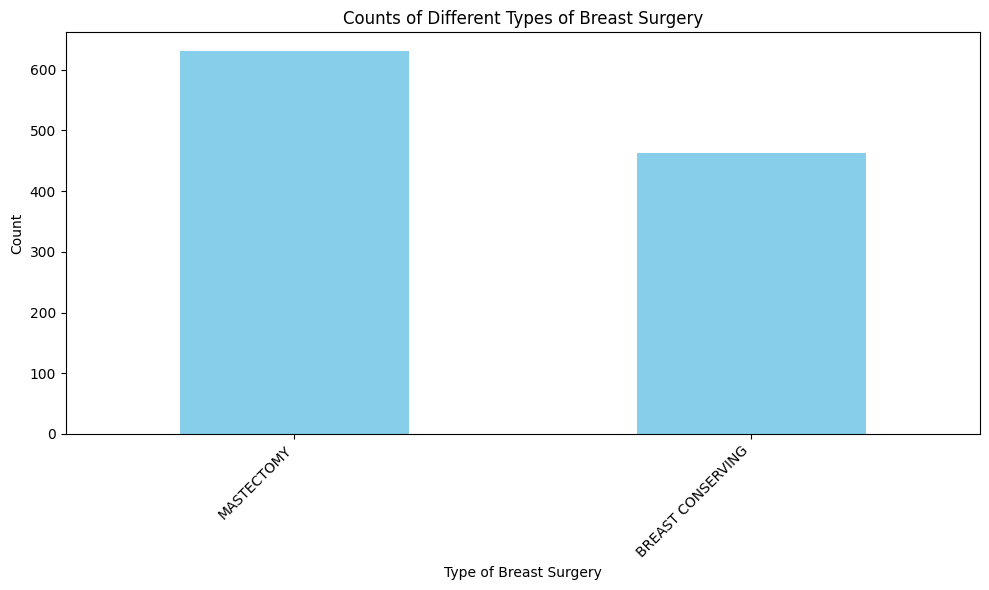

In [12]:
surgery_counts = data['type_of_breast_surgery'].value_counts()

plt.figure(figsize=(10, 6))
surgery_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Type of Breast Surgery')
plt.ylabel('Count')
plt.title('Counts of Different Types of Breast Surgery')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


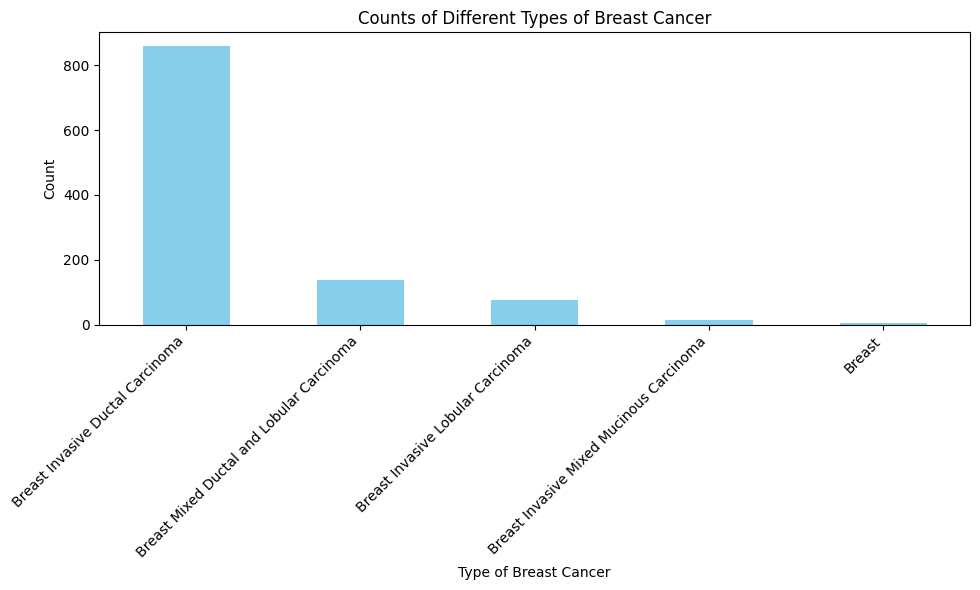

In [13]:

cancer_counts = data['cancer_type_detailed'].value_counts()

plt.figure(figsize=(10, 6))
cancer_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Type of Breast Cancer')
plt.ylabel('Count')
plt.title('Counts of Different Types of Breast Cancer')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## Gene mutation data analysis

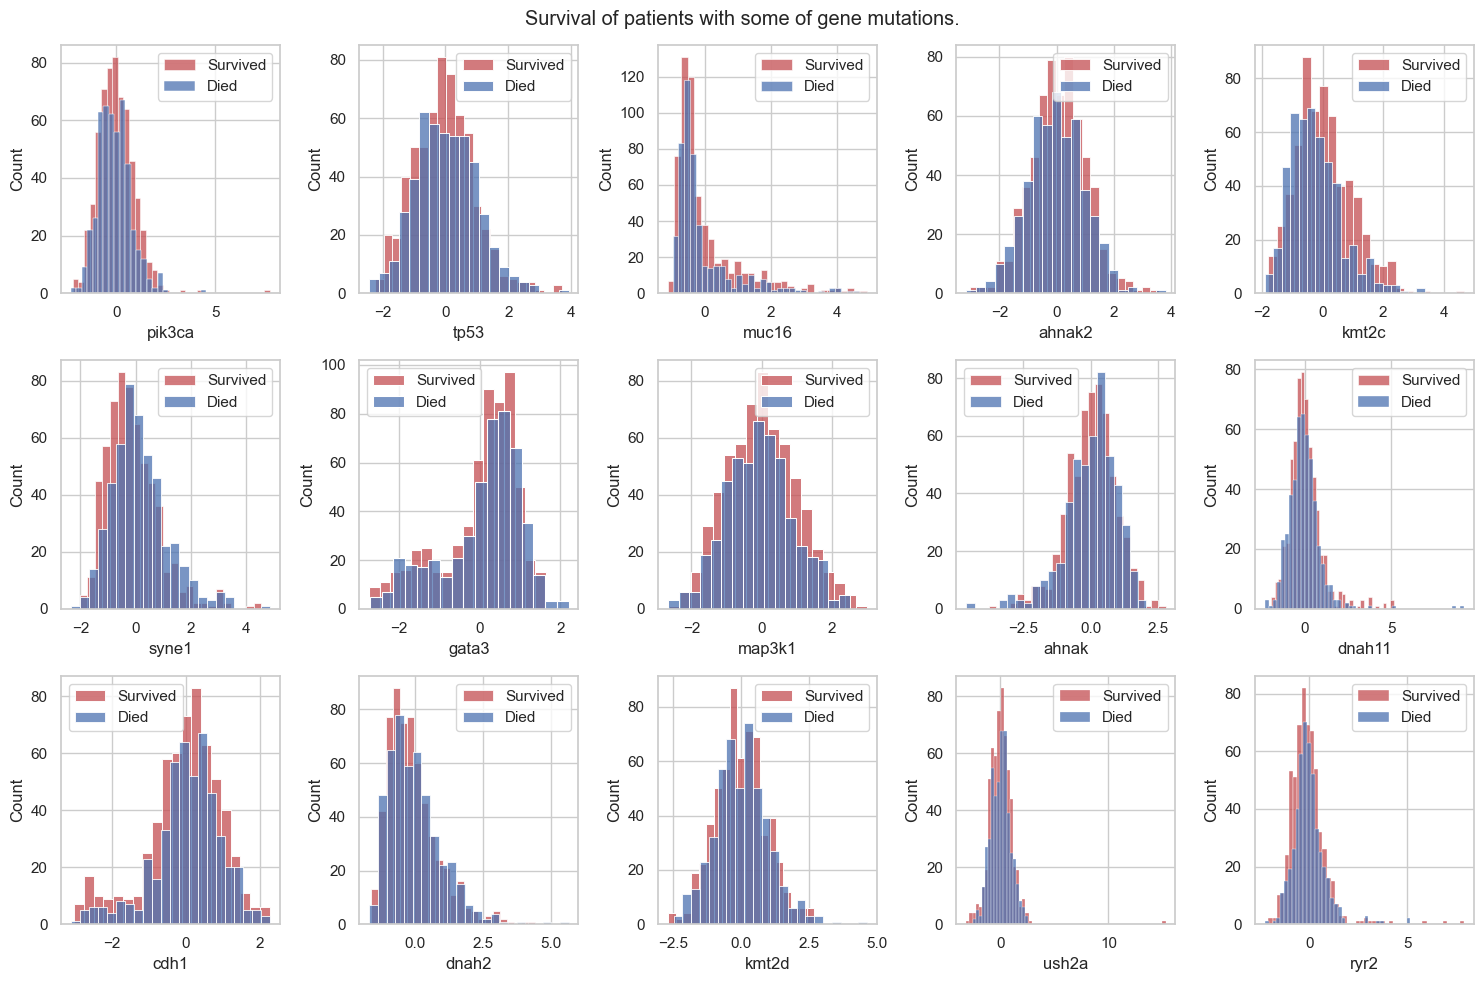

In [15]:
columns = ['pik3ca','tp53','muc16','ahnak2','kmt2c','syne1','gata3','map3k1','ahnak','dnah11','cdh1','dnah2','kmt2d','ush2a','ryr2']   
fig, axs = plt.subplots(3, 5, figsize=(15, 10))
fig.suptitle('Survival of patients with some of gene mutations.')

for i,ax in zip(data.loc[:,columns].columns,axs.flatten()):
    sns.histplot(data[i][data['overall_survival']==0], color='r', label = 'Survived',ax=ax)
    sns.histplot(data[i][data['overall_survival']==1], color='b', label = 'Died',ax=ax)
    ax.legend(loc='best')
plt.tight_layout()
plt.show()

## Survival rate from cancer

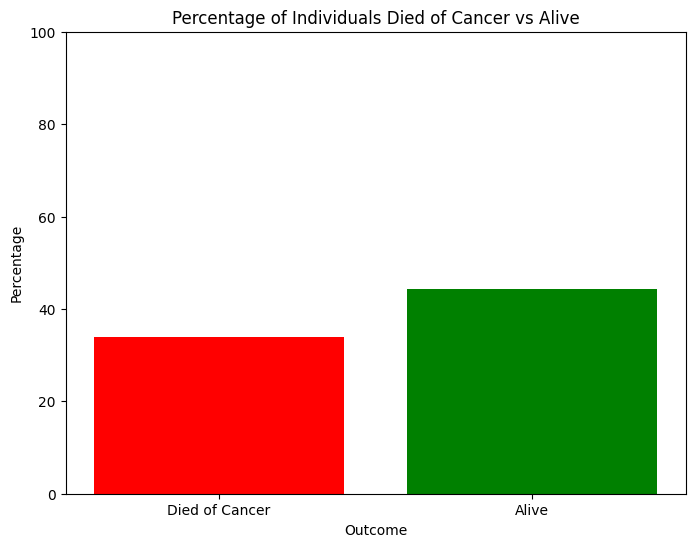

In [17]:
percentage_died = died_cancer.value_counts().sum() / len(data) * 100
percentage_alive = alive.value_counts().sum() / len(data) * 100

# Create labels and corresponding percentages
labels = ['Died of Cancer', 'Alive']
percentages = [percentage_died, percentage_alive]

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.bar(labels, percentages, color=['red', 'green'])
plt.xlabel('Outcome')
plt.ylabel('Percentage')
plt.title('Percentage of Individuals Died of Cancer vs Alive')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100 for percentages
plt.show()

## Data pre-processing

In [16]:
data = data.astype(str)

LE = LabelEncoder()
for column in data.columns:
    if data[column].dtype == "object":
        data[column] = LE.fit_transform(data[column])

## Data Sampling


In [17]:
X = data.drop(columns=['overall_survival'])
y = data.overall_survival

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=20)

print(X_train.shape)
print(y_train.shape)

(982, 691)
(982,)


## Random Forest

In [58]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

rf_pred = RF.predict(X_test)
print("Accuracy score: ",accuracy_score(y_test,rf_pred))
print("F1 score: ",f1_score(y_test,rf_pred,average='weighted'))

Accuracy score:  0.990909090909091
F1 score:  0.9908927165124094


In [73]:
rf_train_pred = RF.predict(X_train)
print("Accuracy score: ",accuracy_score(y_train,rf_train_pred))
print("F1 score: ",f1_score(y_train,rf_train_pred,average='weighted'))

Accuracy score:  1.0
F1 score:  1.0


## Gradient boosting

In [59]:
GB = GradientBoostingClassifier(max_depth=30,max_features='sqrt')
GB.fit(X_train,y_train)

gb_pred = GB.predict(X_test)
print("Accuracy score: ",accuracy_score(y_test,gb_pred))
print("F1 score: ",f1_score(y_test,gb_pred,average='weighted'))

Accuracy score:  0.9636363636363636
F1 score:  0.9634986225895317


In [72]:
gb_train_pred = GB.predict(X_train)
print("Accuracy score: ",accuracy_score(y_train,gb_train_pred))
print("F1 score: ",f1_score(y_train,gb_train_pred,average='weighted'))

Accuracy score:  1.0
F1 score:  1.0


## CNN

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=((691,)), padding='same'))
model.add(MaxPooling1D(pool_size=2, padding='same')) 
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2, padding='same')) 
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2, padding='same')) 
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

# Print model summary
model.summary()
history = model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=500,batch_size=10)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               88576     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 96,962
Trainable params: 96,962
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
99/99 [==============================] - 22s 6ms/step - loss: 119.5400 - accuracy: 0.5051 - val_loss: 56.6779 - val_accuracy: 0.5545
Epoch 2/500
99/99 [====================

In [64]:
loss , accuracy = model.evaluate(X_train, y_train)
print("Training Loss: ", loss, "Training Auuracy: ", accuracy)

31/31 [==============================] - 0s 3ms/step - loss: 0.0505 - accuracy: 0.9980
Training Loss:  0.05048476532101631 Training Auuracy:  0.9979633688926697


In [65]:
loss0 , accuracy0 = model.evaluate(X_test, y_test)
print("Testing Loss: ", loss0, "Testing Auuracy: ", accuracy0)

4/4 [==============================] - 0s 3ms/step - loss: 26.9535 - accuracy: 0.6545
Testing Loss:  26.953516006469727 Testing Auuracy:  0.6545454263687134


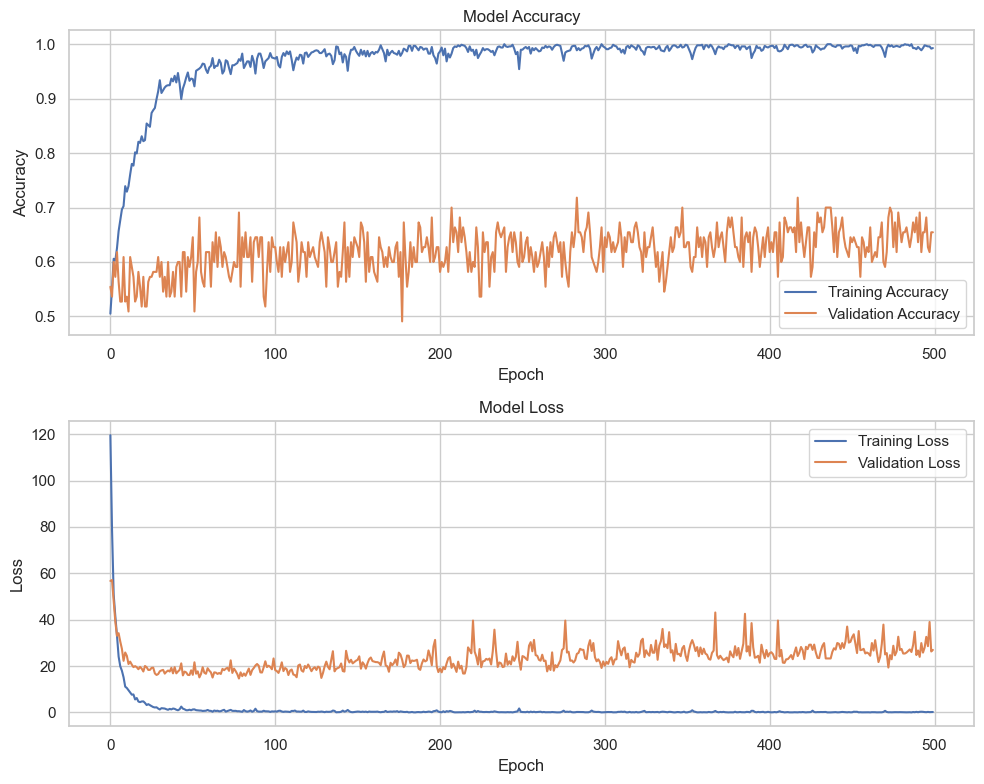

In [27]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend()

axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend()

plt.tight_layout()
plt.show()

## LSTM

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam

input_shape = (691, 1)

model1 = Sequential()
model1.add(LSTM(128, return_sequences=True, input_shape=input_shape))
model1.add(Dropout(0.05))  
model1.add(LSTM(64))
model1.add(Dense(2, activation='softmax'))

model1.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=1e-4),
              metrics=['accuracy'])

model1.summary()
history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=10)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 691, 128)          66560     
                                                                 
 dropout_1 (Dropout)         (None, 691, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 116,098
Trainable params: 116,098
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
99/99 [==============================] - 12s 80ms/step - loss: 0.6911 - accuracy: 0.5499 - val_loss: 0.6858 - val_accuracy: 0.5909
Epoch 2/500
99/99 [==================

In [62]:
loss_1 , accuracy_1 = model1.evaluate(X_train, y_train)
print("Training Loss: ", loss_1, "Training Auuracy: ", accuracy_1)

31/31 [==============================] - 1s 33ms/step - loss: 0.6870 - accuracy: 0.5530
Training Loss:  0.6869980096817017 Training Auuracy:  0.5529531836509705


In [63]:
loss_2 , accuracy_2 = model1.evaluate(X_test, y_test)
print("Testing Loss: ", loss_2, "Testing Auuracy: ", accuracy_2)

4/4 [==============================] - 0s 33ms/step - loss: 0.6824 - accuracy: 0.5909
Testing Loss:  0.682412326335907 Testing Auuracy:  0.5909090638160706


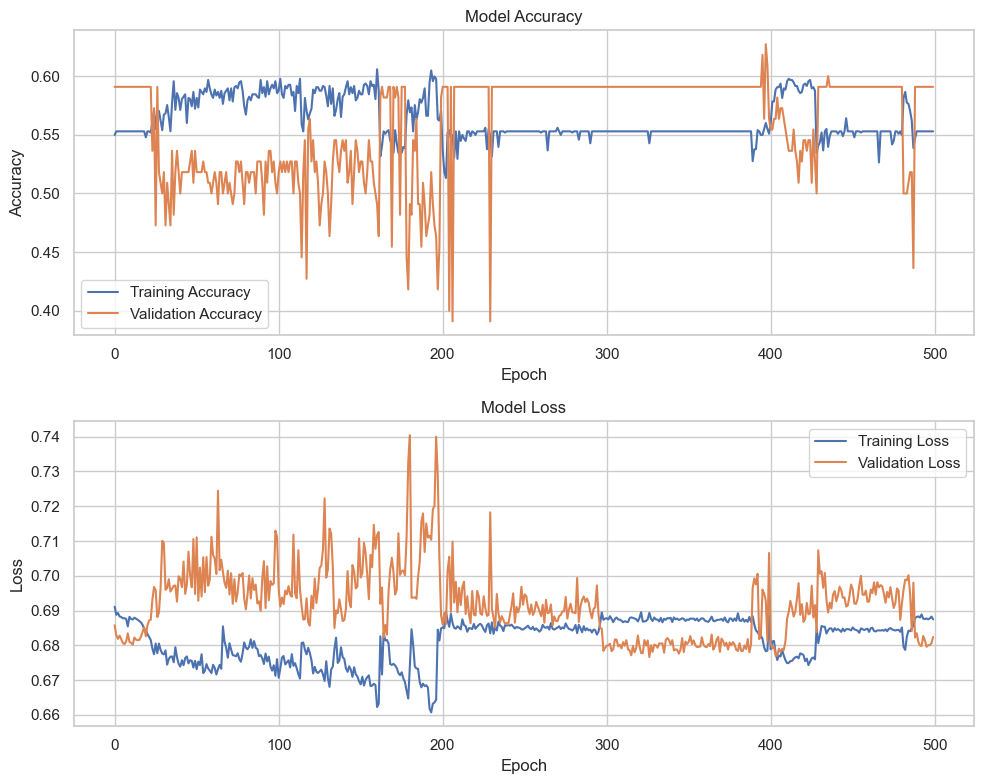

In [31]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend()

axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend()

plt.tight_layout()
plt.show()

## CNN + LSTM

In [32]:
# Convert DataFrame to numpy array
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# Reshape input data to 3D format (assuming each sample has 691 features)
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], 1, X_train_array.shape[1])
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], 1, X_test_array.shape[1])

# Check the shape after reshaping
print("Original shape:", X_train_array.shape)
print("Reshaped shape:", X_train_reshaped.shape)

# Create the CNN-LSTM model
model2 = Sequential()

# Add Convolutional layers
# Add Convolutional layers
model2.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(1, X_train.shape[1]), padding='same'))
model2.add(MaxPooling1D(pool_size=2, padding='same')) 
model2.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(1, X_train.shape[1]), padding='same'))
model2.add(MaxPooling1D(pool_size=2, padding='same')) 
model2.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(1, X_train.shape[1]), padding='same'))
model2.add(MaxPooling1D(pool_size=2, padding='same')) 


# Add LSTM layer
model2.add(LSTM(128, return_sequences=False))

# Add Dense layers
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))  
model2.add(Dense(2, activation='softmax'))

# Compile the model
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=1e-4),
              metrics=['accuracy'])

# Print model summary
model2.summary()

# Train the model
history = model2.fit(X_train_reshaped, y_train, validation_data=(X_test_reshaped, y_test), epochs=500, batch_size=10)


Original shape: (982, 691)
Reshaped shape: (982, 1, 691)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 32)             66368     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 32)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 32)             3104      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 32)            0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 1, 32)             3104      
                                                               

In [61]:
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], 1, X_train_array.shape[1])
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], 1, X_test_array.shape[1])


loss1 , accuracy1 = model2.evaluate(X_train_reshaped, y_train)
print("Training Loss: ", loss, "Training Auuracy: ", accuracy)

31/31 [==============================] - 0s 7ms/step - loss: 1.0797 - accuracy: 0.8350
Training Loss:  4.077232837677002 Training Auuracy:  0.581818163394928


In [60]:
loss2 , accuracy2 = model2.evaluate(X_test_reshaped, y_test)
print("Testing Loss: ", loss2, "Testing Auuracy: ", accuracy2)

4/4 [==============================] - 0s 9ms/step - loss: 4.0772 - accuracy: 0.5818
Testing Loss:  4.077232837677002 Testing Auuracy:  0.581818163394928


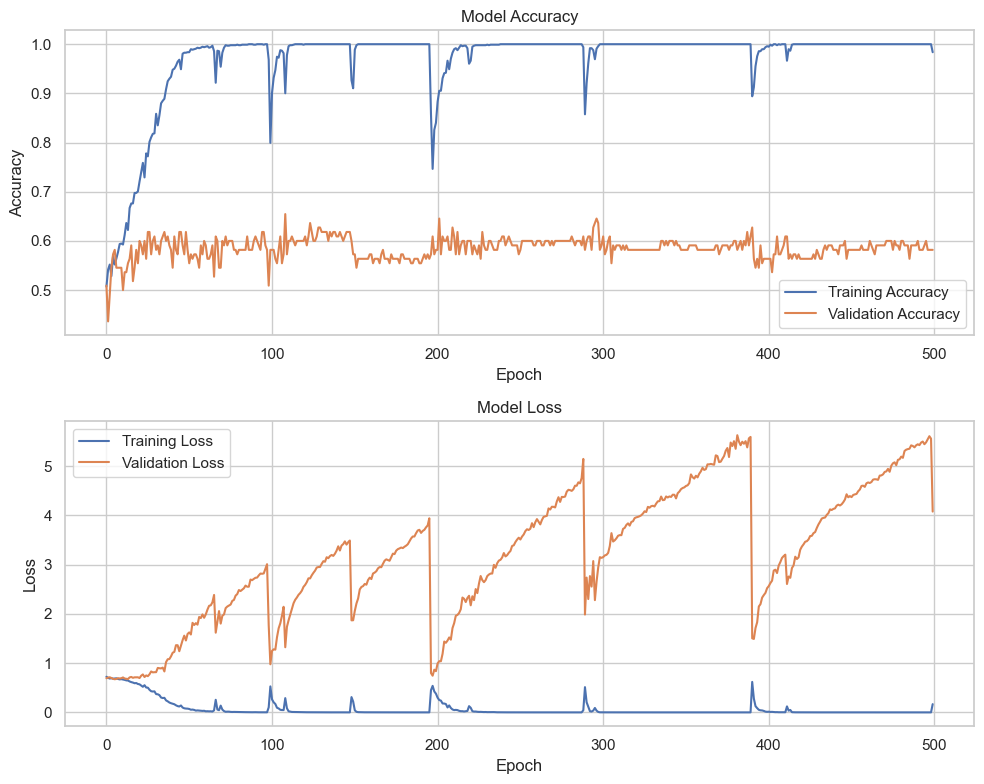

In [35]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend()

axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend()

plt.tight_layout()
plt.show()

## Comparision

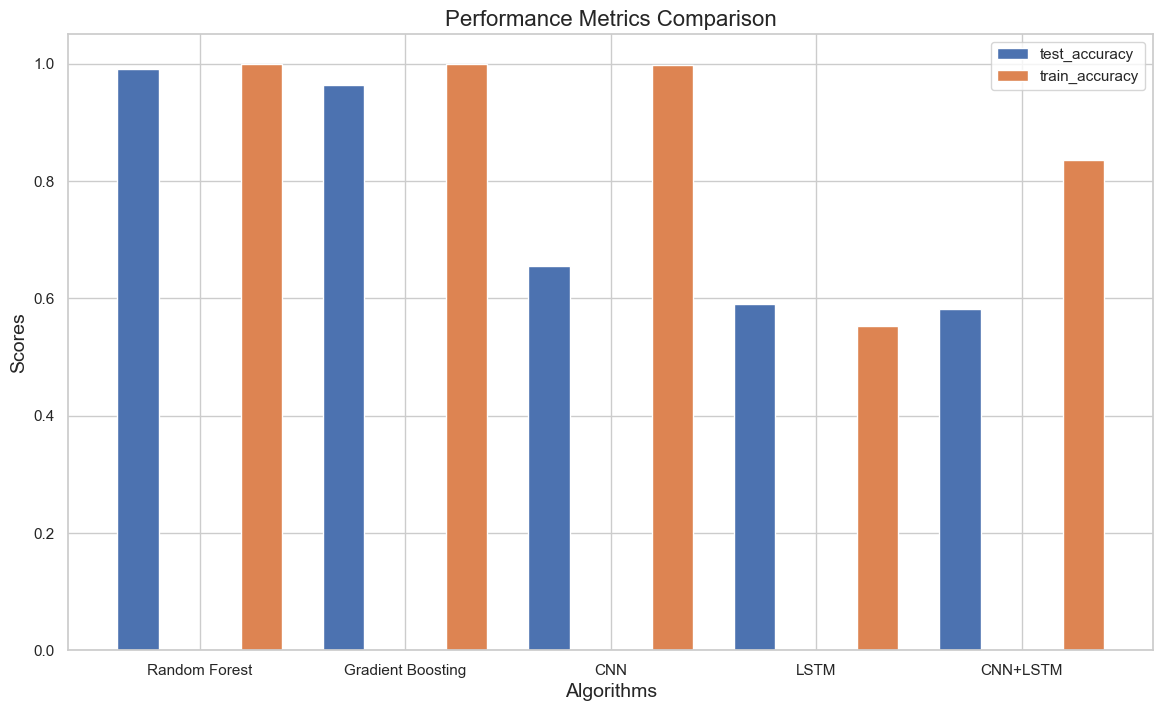

In [80]:
algorithms = ["Random Forest", "Gradient Boosting" ,"CNN", "LSTM", "CNN+LSTM"]
test_accuracy = [accuracy_score(y_test,rf_pred), accuracy_score(y_test,gb_pred), accuracy0,accuracy_2,accuracy2]
train_accuracy = [accuracy_score(y_train,rf_train_pred), accuracy_score(y_train,gb_train_pred), accuracy,accuracy_1,accuracy1]

# Set the width of the bars
bar_width = 0.2

# Set the positions for the bars
index = range(len(algorithms))

# Plot the grouped bar chart
plt.figure(figsize=[14, 8])
plt.bar(index, test_accuracy, width=bar_width, label='test_accuracy',align='center')
plt.bar([i + 3 * bar_width for i in index], train_accuracy, width=bar_width, label='train_accuracy',align='center')

plt.xlabel('Algorithms', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.title('Performance Metrics Comparison', fontsize=16)
plt.xticks([i + 1.5 * bar_width for i in index], algorithms)
plt.legend()

plt.show()